# Part II - Prosper Loans
## by Lucas Leal da Silva

## Investigation Overview

My main focus on this investigation was to understand the behavior of the borrowers regarding different characteristics when taking a loan, like income range and listing category.

## Dataset Overview

The dataset used was about 113,937 loans lent by the company Prosper, taken between 09/11/2005 and 10/03/2014. The original dataset included a total of 81 columns characterizing each loan, but I reduced it to 21 columns as a way to simplify the exploration of it, and focusing on the variables like date, borrower characterization, and other loan related variables like amount and status.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# data wrangling

# reducing the number of columns of the dataset to only interesting ones for this project
interest_columns = ['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
                    'ProsperScore', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus',
                    'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'TotalCreditLinespast7years',
                    'DelinquenciesLast7Years', 'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)',
                    'IncomeRange', 'StatedMonthlyIncome', 'IncomeVerifiable', 'LoanKey', 'LoanCurrentDaysDelinquent',
                    'LoanOriginalAmount']
loans = loans[interest_columns]

# change column names to snake case for better code aesthetic
loans.columns = ['listing_creation_date', 'term', 'loan_status', 'borrower_apr',
                 'borrower_rate', 'prosper_score', 'listing_category', 'occupation',
                 'employment_status', 'employment_status_duration', 'is_borrower_homeowner',
                 'total_credit_lines_past_7years', 'delinquencies_last_7years', 'available_bankcard_credit',
                 'trades_never_delinquent_rate', 'income_range', 'stated_monthly_income', 'income_verifiable',
                 'loan_key', 'loan_current_days_delinquent', 'loan_original_amount']

# changing variable types to help visualizations
loans.listing_creation_date = pd.to_datetime(loans.listing_creation_date)

# Mapping the listing categories to their respective values
listing_categories_map = {
    0: 'Not Available', 1: 'Debt Consolidation',
    2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
    5: 'Student Use', 6: 'Auto', 7: 'Other',
    8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
    11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses',
    14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle',
    17: 'RV', 18: 'Taxes', 19: 'Vacation',  20: 'Wedding Loans'
}
loans['listing_category'] = loans.listing_category.map(listing_categories_map)

# convert income_range into ordered categorical variable
categories_order = ['Not displayed', 'Not employed', '$0', '$1-24,999',
                    '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=categories_order)
loans['income_range'] = loans['income_range'].astype(ordered_var)

In [4]:
def set_title_labels_plot(title, xlabel='', ylabel='', xticks_rotate=False):
    """ Set the title, xlabel, ylabel and xticks rotation of a plot. """
    plt.title(title);
    
    if xlabel != '':
        plt.xlabel(xlabel);
    
    if ylabel != '':
        plt.ylabel(ylabel);

    if xticks_rotate:
        plt.xticks(rotation=45)

## Average Amount Lent per Year

The biggest influence of the average amount of money lent seems to be the year that the loan was created, as almost all of the ranges and categories had similar increases and decreases between the consecutive years.

Let's start by looking at how the **Average Amount** of money lent changes between the different years available in our dataset. We can see that in normal periods, the average amount lent increases from a year to the next one, but during the crisis period of 2007 and 2008, we have a drastic reduce in it, returning to raise back only from 2009 to 2010.

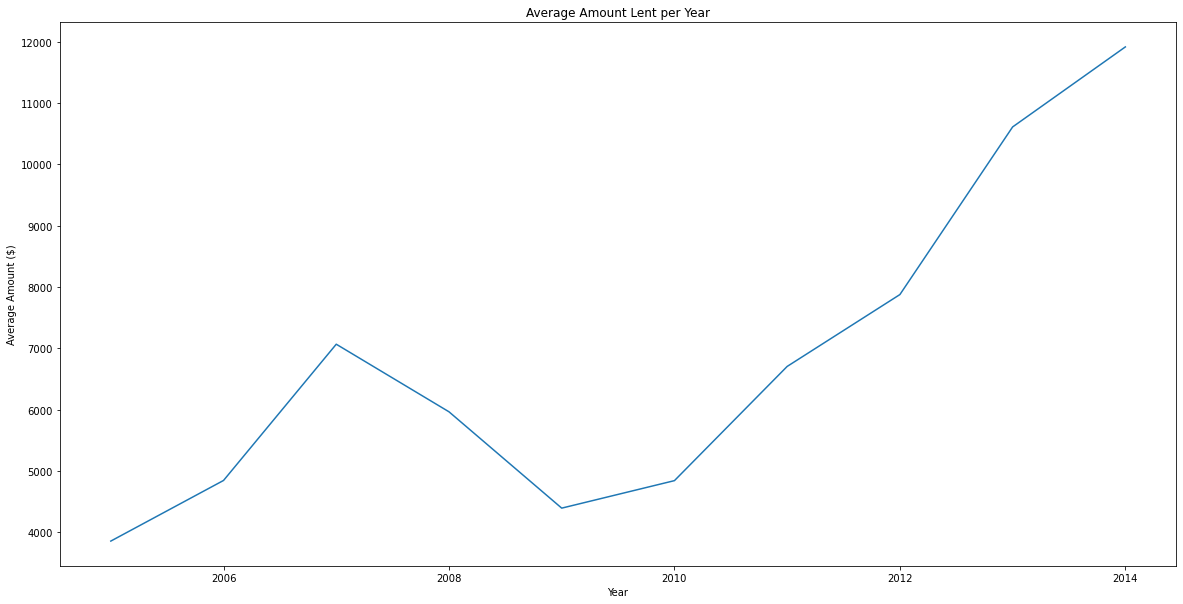

In [10]:
loans['creation_year'] = loans.listing_creation_date.dt.year

plt.figure(figsize=(20, 10))
sb.lineplot(data=loans, x='creation_year', y='loan_original_amount', ci=None)
set_title_labels_plot('Average Amount Lent per Year', 'Year', 'Average Amount ($)')

## Amount Lent by Category

We can see also that this trend is followed by the main categories (the ones present in almost every years). This is important because no a similar behavior between completely different categories shows that the year is globally affecting the data.

Also related by the category, we should investigate further why the average amount of money lent to "Not Available" category had a sudden raise after 2013.

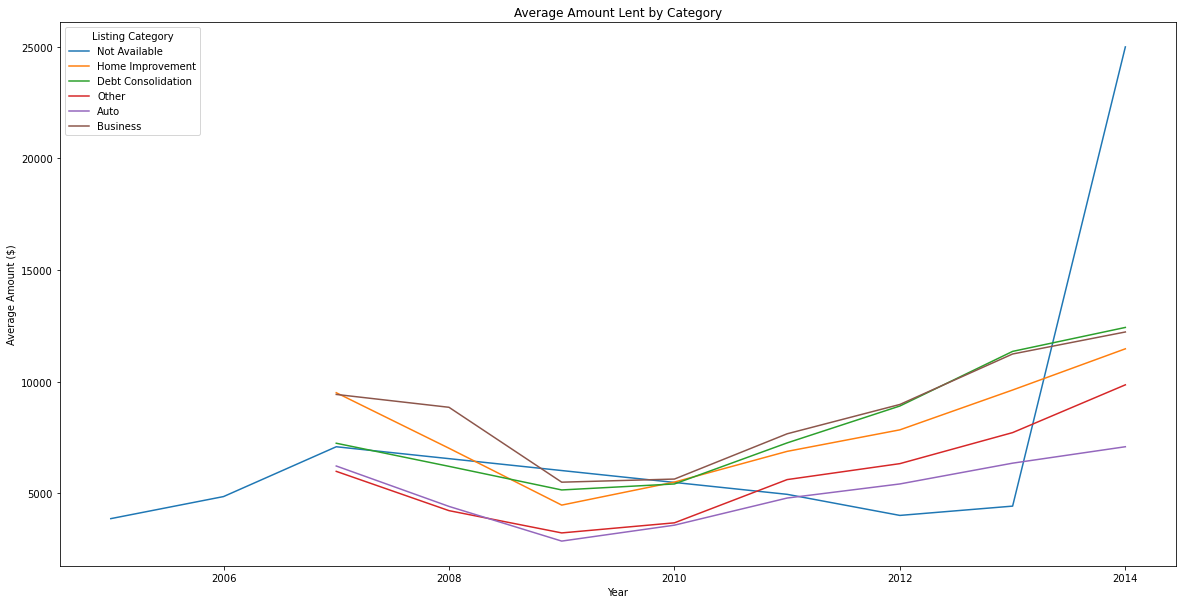

In [18]:
plt.figure(figsize=(20, 10))

main_categories = ['Not Available', 'Home Improvement', 'Debt Consolidation',
                   'Other', 'Auto', 'Business']
filtered_loans = loans.query('listing_category in @main_categories')
sb.lineplot(data=filtered_loans, x='creation_year', y='loan_original_amount', hue='listing_category', ci=None)
plt.legend(title='Listing Category')
set_title_labels_plot('Average Amount Lent by Category', 'Year', 'Average Amount ($)')

## Amount Lent by Income Range

Similar to the last visualization, now we will take a look on the behavior of the average amount lent per year by each income range. This shows us again that the main effect on the average is the year of the loan creation, as the different income ranges have almost parallels lines.

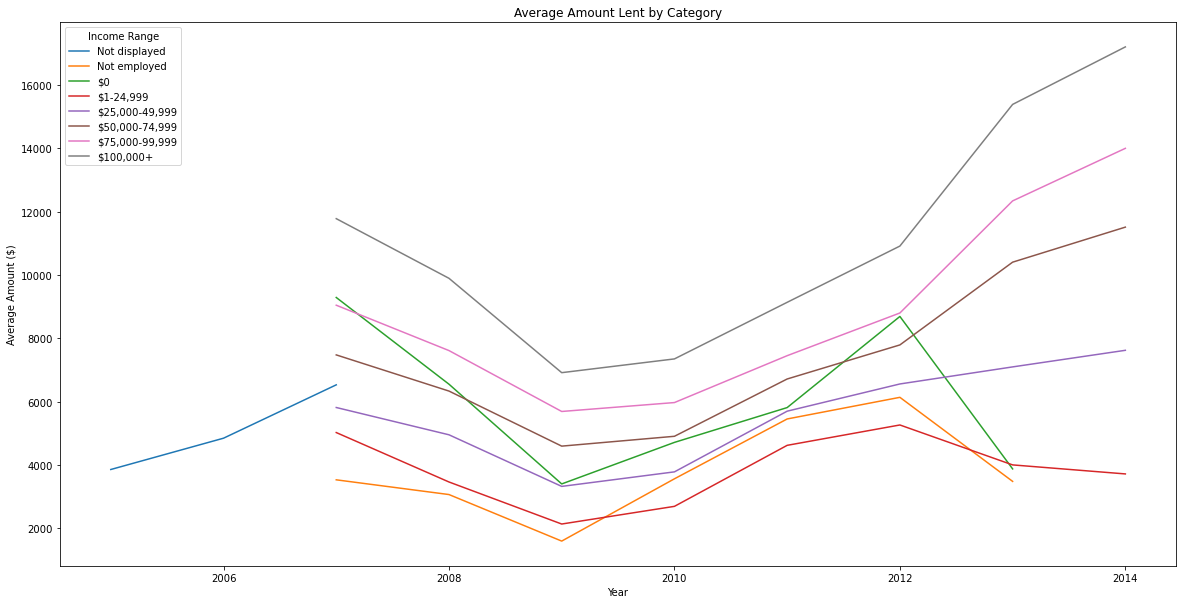

In [20]:
plt.figure(figsize=(20, 10))
sb.lineplot(data=loans, x='creation_year', y='loan_original_amount', hue='income_range', ci=None)
plt.legend(title='Income Range')
set_title_labels_plot('Average Amount Lent by Category', 'Year', 'Average Amount ($)')

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt